In [ ]:
import torch 
import numpy as np
from PIL import Image
from skimage.io import imread, imsave
from torchvision.io import read_image
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [ ]:
input_file = "/home/mgj/workspace/mgjeon/image-to-image/datasets/facades/train/A/1.jpg"
target_file = "/home/mgj/workspace/mgjeon/image-to-image/datasets/facades/train/B/1.jpg"

In [ ]:
input_pil = np.array(Image.open(input_file))
input_pil.shape

(256, 256, 3)

In [ ]:
input_pil_rgb = np.array(Image.open(input_file).convert('RGB'))
input_pil_rgb.shape

(256, 256, 3)

In [ ]:
print(input_pil[0, 0, :])
print(input_pil_rgb[0, 0, :])

[  0  48 255]
[  0  48 255]


In [ ]:
input_sklearn = imread(input_file)
input_sklearn.shape

(256, 256, 3)

In [ ]:
print(input_sklearn[0, 0, :])

[  0  48 255]


In [ ]:
input_torchvision = read_image(input_file)
input_torchvision.shape

torch.Size([3, 256, 256])

In [ ]:
print(input_torchvision[:, 0, 0])

tensor([  0,  48, 255], dtype=torch.uint8)


In [ ]:
import albumentations as A

In [ ]:
MinVal = 0
MaxVal = 255
m = (MinVal + MaxVal) / 2
s = (MaxVal - MinVal) / 2

def denormalize(x):
    x = x * s + m
    x = np.clip(x, MinVal, MaxVal)
    x = x.astype(np.uint8)
    return x

transform = A.Compose([
    A.VerticalFlip(p=0.5),
    A.Normalize(mean=[m, m, m], std=[s, s, s], max_pixel_value=1.0),  # [-1, 1]
], 
    additional_targets = {
        'image_target': 'image',
    }
)

# transform_inverse = A.Compose([
#     A.Normalize(mean=[-1, -1, -1], std=[1, 1, 1]),
# ], 
#     additional_targets = {
#         'image_target': 'image',
#     }
# )

In [ ]:
input_pil = np.array(Image.open(input_file))
target_pil = np.array(Image.open(target_file))

In [ ]:
input_pil.dtype

dtype('uint8')

In [ ]:
print(np.max(input_pil), np.min(input_pil), np.mean(input_pil), np.std(input_pil))
print(np.max(target_pil), np.min(target_pil), np.mean(target_pil), np.std(target_pil))

255 0 105.55755106608073 102.3869037918577
252 0 104.56314086914062 69.60165765217927


1.0 -1.0 -0.17209764 0.8030346
0.97647065 -1.0 -0.17989697 0.54589534


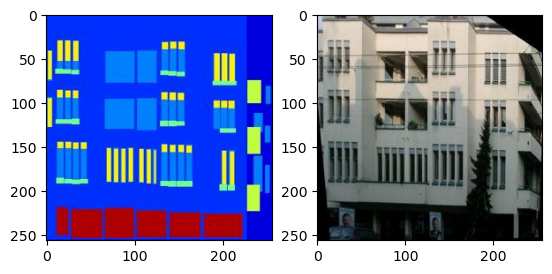

In [ ]:
transformed = transform(image=input_pil, image_target=target_pil)
transformed_input_pil = transformed["image"]
transformed_target_pil = transformed["image_target"]

print(np.max(transformed_input_pil), np.min(transformed_input_pil), np.mean(transformed_input_pil), np.std(transformed_input_pil))
print(np.max(transformed_target_pil), np.min(transformed_target_pil), np.mean(transformed_target_pil), np.std(transformed_target_pil))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(denormalize(transformed_input_pil))
plt.subplot(1, 2, 2)
plt.imshow(denormalize(transformed_target_pil))
plt.show()

In [ ]:
transformed_input_pil.dtype

dtype('float32')

In [ ]:
denormalized_input_pil = denormalize(transformed_input_pil)
denormalized_target_pil = denormalize(transformed_target_pil)

print(np.max(denormalized_input_pil), np.min(denormalized_input_pil), np.mean(denormalized_input_pil), np.std(denormalized_input_pil))
print(np.max(denormalized_target_pil), np.min(denormalized_target_pil), np.mean(denormalized_target_pil), np.std(denormalized_target_pil))

255 0 105.40725708007812 102.53031775523002
252 0 104.36792500813802 69.86207465238157


In [ ]:
denormalized_input_pil.dtype

dtype('uint8')

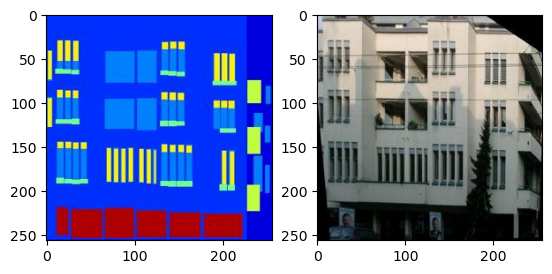